In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
# import cartopy.feature as cft

## Load GLORYS data
Lives at `/g/data/jk72/mxr581/SOTS-project-data/glorys/`.
File `glorys_subset_monthly.nc` has monthly data for 2010--2025 for the area bounded by (minimum longitude = 130.76, maximum longitude = 158.24 , minimum latitude = -55.24, maximum latitude = -29.76)

| Variable Name | Description                                   |
|---------------|-----------------------------------------------|
| so            | Salinity (PSU)      |
| thetao        | Potential temperature (degrees C)          |
| uo            | Zonal (east-west) velocity (m/s)         |
| vo            | Meridional (north-south) velocity (m/s)    |
| zos           | Sea surface height above geoid    (m)           |


In [13]:
# ## Merge the two netcdf files covering different periods
# # Load years 2010-2021
# file = '/g/data/jk72/mxr581/SOTS-project-data/glorys/glorys_subset_monthly.nc'
# da = xr.open_dataset(file)

# # Load interim years 2021-2025
# file = '/g/data/jk72/mxr581/SOTS-project-data/glorys/glorys_subset_monthly_interim.nc'
# da_int = xr.open_dataset(file)

# # Concatenate along the 'time' dimension
# da_merged = xr.concat([da, da_int], dim='time')

# # save merged dataset
# da_merged.to_netcdf('/g/data/jk72/mxr581/SOTS-project-data/glorys/glorys_subset_monthly_merged.nc')

In [17]:
file = '/g/data/jk72/mxr581/SOTS-project-data/glorys/glorys_subset_monthly_merged.nc'
da = xr.open_dataset(file)

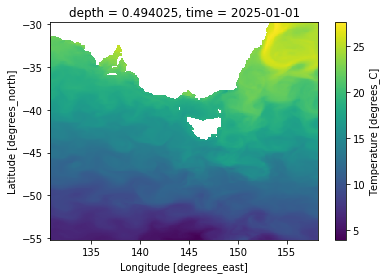

In [26]:
# test plot
SST_snapshot = da.thetao.isel(time=-1).sel(depth = 0.5, method = 'nearest')
SST_snapshot.plot()

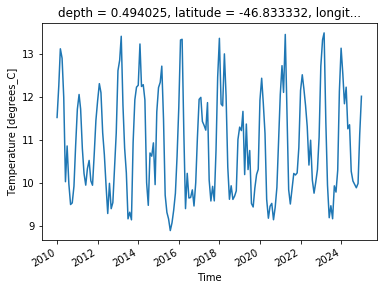

In [28]:
# plot SST timeseries
lat_SOTS = -46.8
lon_SOTS = 142
SST_SOTS = da.thetao.sel(depth = 0.5, latitude = lat_SOTS, longitude = lon_SOTS, method = 'nearest')
SST_SOTS.plot()

In [38]:
da.zos

<xarray.DataArray 'zos' (time: 181, latitude: 305, longitude: 329)>
[18162445 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 -55.166668 -55.083332 ... -29.833334
  * longitude  (longitude) float32 130.83333 130.91667 ... 158.08333 158.16667
  * time       (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2025-01-01
Attributes:
    units:          m
    standard_name:  sea_surface_height_above_geoid
    unit_long:      Meters
    valid_max:      6100
    long_name:      Sea surface height
    valid_min:      -7000